In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

%matplotlib inline
plt.style.use('ggplot')

In [9]:
df = pd.read_csv('data/results.csv')
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [38]:
fifa_all = df[df['tournament'].str.contains('FIFA', regex=True)]
fifa_all.head(n=10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
1277,1930-07-13,Belgium,USA,0,3,FIFA World Cup,Montevideo,Uruguay,True
1278,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True
1279,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True
1280,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True
1281,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True
1282,1930-07-16,Chile,Mexico,3,0,FIFA World Cup,Montevideo,Uruguay,True
1283,1930-07-17,Bolivia,Yugoslavia,0,4,FIFA World Cup,Montevideo,Uruguay,True
1284,1930-07-17,Paraguay,USA,0,3,FIFA World Cup,Montevideo,Uruguay,True
1286,1930-07-18,Uruguay,Peru,1,0,FIFA World Cup,Montevideo,Uruguay,False
1287,1930-07-19,Argentina,Mexico,6,3,FIFA World Cup,Montevideo,Uruguay,True


In [39]:
fifa.describe

<bound method NDFrame.describe of              date           home_team    away_team  home_score  away_score  \
1277   1930-07-13             Belgium          USA           0           3   
1278   1930-07-13              France       Mexico           4           1   
1279   1930-07-14              Brazil   Yugoslavia           1           2   
1280   1930-07-14                Peru      Romania           1           3   
1281   1930-07-15           Argentina       France           1           0   
1282   1930-07-16               Chile       Mexico           3           0   
1283   1930-07-17             Bolivia   Yugoslavia           0           4   
1284   1930-07-17            Paraguay          USA           0           3   
1286   1930-07-18             Uruguay         Peru           1           0   
1287   1930-07-19           Argentina       Mexico           6           3   
1288   1930-07-19               Chile       France           1           0   
1289   1930-07-20             

In [40]:
fifa.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [44]:
fifa.loc[:,'date'] = pd.to_datetime(fifa.loc[:, 'date'])
fifa.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

In [48]:
fifa['year'] = fifa['date'].dt.year

In [49]:
fifa.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
1277,1930-07-13,Belgium,USA,0,3,FIFA World Cup,Montevideo,Uruguay,True,1930
1278,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,1930
1279,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True,1930
1280,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True,1930
1281,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,1930


In [51]:
fifa.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
year                   int64
dtype: object

In [52]:
fifa['diff_score'] = fifa['home_score'] - fifa['away_score']

In [53]:
fifa.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,diff_score
1277,1930-07-13,Belgium,USA,0,3,FIFA World Cup,Montevideo,Uruguay,True,1930,-3
1278,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,1930,3
1279,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True,1930,-1
1280,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True,1930,-2
1281,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,1930,1


In [54]:
fifa.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
year                   int64
diff_score             int64
dtype: object

In [55]:
fifa['win_team'] = ''

In [56]:
fifa.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,diff_score,win_team
1277,1930-07-13,Belgium,USA,0,3,FIFA World Cup,Montevideo,Uruguay,True,1930,-3,
1278,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,1930,3,
1279,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True,1930,-1,
1280,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True,1930,-2,
1281,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,1930,1,


In [57]:
fifa['diff_score'] = pd.to_numeric(fifa['diff_score'])

In [58]:
fifa.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,diff_score,win_team
1277,1930-07-13,Belgium,USA,0,3,FIFA World Cup,Montevideo,Uruguay,True,1930,-3,
1278,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,1930,3,
1279,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True,1930,-1,
1280,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True,1930,-2,
1281,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,1930,1,


In [59]:
fifa.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
year                   int64
diff_score             int64
win_team              object
dtype: object

In [62]:
fifa.loc[fifa['diff_score']>0, 'win_team'] = fifa.loc[fifa['diff_score']>0, 'home_team']
fifa.loc[fifa['diff_score']<0, 'win_team'] = fifa.loc[fifa['diff_score']<0, 'away_team']
fifa.loc[fifa['diff_score'] == 0, 'win_team'] = 'draw'
fifa.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,diff_score,win_team
1277,1930-07-13,Belgium,USA,0,3,FIFA World Cup,Montevideo,Uruguay,True,1930,-3,USA
1278,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,1930,3,France
1279,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True,1930,-1,Yugoslavia
1280,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True,1930,-2,Romania
1281,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,1930,1,Argentina


In [63]:
def find_win_team(df):
    winners = []
    for i, row in df.iterrows():
        if row['home_score'] > row['away_score']:
            winners.append(row['home_team'])
        elif row['home_score'] < row['away_score']:
            winners.append(row['away_team'])
        else:
            winners.append('draw')
    return winners

fifa['winner'] = find_win_team(fifa)
fifa.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,diff_score,win_team,winner
1277,1930-07-13,Belgium,USA,0,3,FIFA World Cup,Montevideo,Uruguay,True,1930,-3,USA,USA
1278,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,1930,3,France,France
1279,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True,1930,-1,Yugoslavia,Yugoslavia
1280,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True,1930,-2,Romania,Romania
1281,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,1930,1,Argentina,Argentina


In [67]:
winner_wins = fifa.groupby('winner')['winner'].couｎｔ()

In [72]:
winner_wins.sort_values(ascending=False, inplace=True)

In [74]:
winner_wins

winner
draw                  186
Brazil                 70
Germany                66
Italy                  45
Argentina              42
Spain                  29
France                 28
Netherlands            27
England                26
Uruguay                20
Russia                 17
Sweden                 16
Poland                 15
Hungary                15
Belgium                14
Yugoslavia             14
Mexico                 14
Portugal               13
Austria                12
Chile                  11
Czechoslovakia         11
Switzerland            11
USA                     8
Denmark                 8
Romania                 8
Croatia                 7
Colombia                7
Paraguay                7
Korea Republic          5
Turkey                  5
                     ... 
Ghana                   4
Japan                   4
Ecuador                 4
Cameroon                4
Scotland                4
Bulgaria                3
Algeria                 3
Ivory

In [75]:
winner_wins.head(20)

winner
draw           186
Brazil          70
Germany         66
Italy           45
Argentina       42
Spain           29
France          28
Netherlands     27
England         26
Uruguay         20
Russia          17
Sweden          16
Poland          15
Hungary         15
Belgium         14
Yugoslavia      14
Mexico          14
Portugal        13
Austria         12
Chile           11
Name: winner, dtype: int64

In [79]:
winner_wins.drop(labels=['draw'], inplace=True)

In [80]:
winner_wins.head(5)

winner
Brazil       70
Germany      66
Italy        45
Argentina    42
Spain        29
Name: winner, dtype: int64

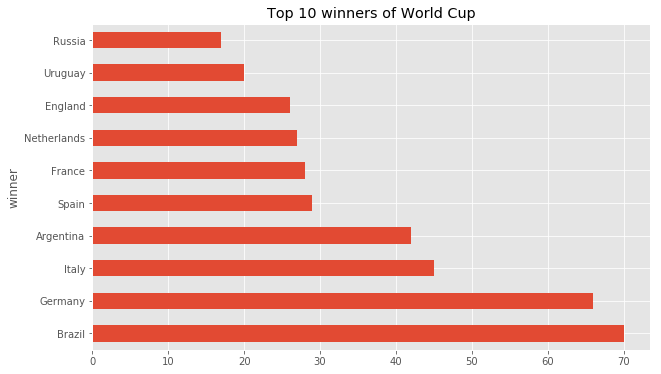

In [90]:
winner_wins.head(10).plot(kind='barh', figsize=(10,6), title='Top 10 winners of World Cup')

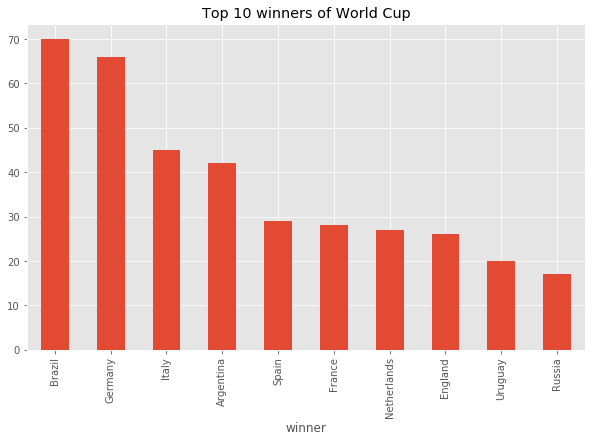

In [89]:
winner_wins.head(10).plot(kind='bar', figsize=(10,6), title='Top 10 winners of World Cup')

In [91]:
winner_winrate = winner_wins/winner_wins.sum()

In [92]:
winner_winrate

winner
Brazil                0.107692
Germany               0.101538
Italy                 0.069231
Argentina             0.064615
Spain                 0.044615
France                0.043077
Netherlands           0.041538
England               0.040000
Uruguay               0.030769
Russia                0.026154
Sweden                0.024615
Poland                0.023077
Hungary               0.023077
Belgium               0.021538
Yugoslavia            0.021538
Mexico                0.021538
Portugal              0.020000
Austria               0.018462
Chile                 0.016923
Czechoslovakia        0.016923
Switzerland           0.016923
USA                   0.012308
Denmark               0.012308
Romania               0.012308
Croatia               0.010769
Colombia              0.010769
Paraguay              0.010769
Korea Republic        0.007692
Turkey                0.007692
Costa Rica            0.007692
                        ...   
Ghana                 0.006154
J

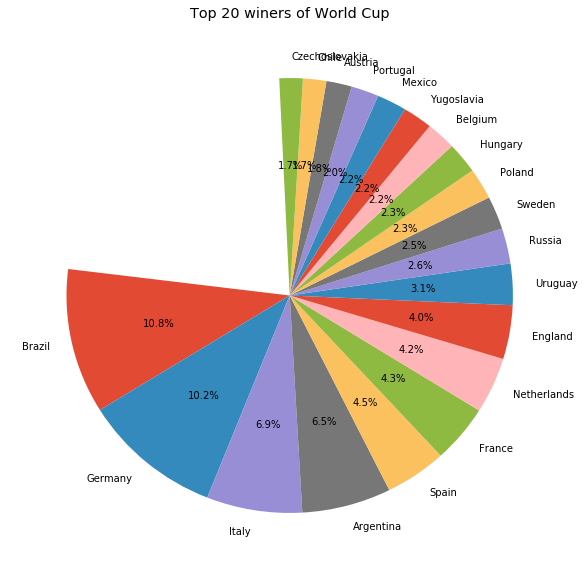

In [105]:
winner_winrate.head(20).plot(kind='pie', figsize=(10,10), autopct='%.1f%%', startangle=173,title='Top 20 winers of World Cup', label='')

In [106]:
winner_wins.get('China', default='NA')

'NA'

In [110]:
winner_wins.get('Japan', default='NA')

4

In [114]:
score_home = fifa[['home_team', 'home_score']]
column_update =['team', 'score']
score_home.columns=column_update
score_home

,team,score
1277,Belgium,0
1278,France,4
1279,Brazil,1
1280,Peru,1
1281,Argentina,1
1282,Chile,3
1283,Bolivia,0
1284,Paraguay,0
1286,Uruguay,1
1287,Argentina,6


In [116]:
score_away = fifa[['away_team', 'away_score']]
column_update =['team', 'score']
score_away.columns=column_update
score_away

,team,score
1277,USA,3
1278,Mexico,1
1279,Yugoslavia,2
1280,Romania,3
1281,France,0
1282,Mexico,0
1283,Yugoslavia,4
1284,USA,3
1286,Peru,0
1287,Mexico,3


In [117]:
score = pd.concat([score_home, score_away], ignore_index=True)

In [118]:
score

,team,score
0,Belgium,0
1,France,4
2,Brazil,1
3,Peru,1
4,Argentina,1
5,Chile,3
6,Bolivia,0
7,Paraguay,0
8,Uruguay,1
9,Argentina,6


In [119]:
score_sum = score.groupby('team')['score'].sum()
score_sum.sort_values(ascending=False,inplace=True)
score_sum

team
Germany                 224
Brazil                  221
Argentina               131
Italy                   128
France                  106
Spain                    92
Hungary                  87
Netherlands              86
Uruguay                  80
England                  79
Sweden                   74
Russia                   66
Mexico                   57
Yugoslavia               55
Belgium                  52
Switzerland              45
Czechoslovakia           44
Poland                   44
Portugal                 43
Austria                  43
Chile                    40
USA                      37
Korea Republic           31
Romania                  30
Paraguay                 30
Denmark                  27
Colombia                 26
Scotland                 25
Bulgaria                 22
Croatia                  21
                       ... 
Iran                      7
Norway                    7
Korea DPR                 6
Ukraine                   5
Cuba           

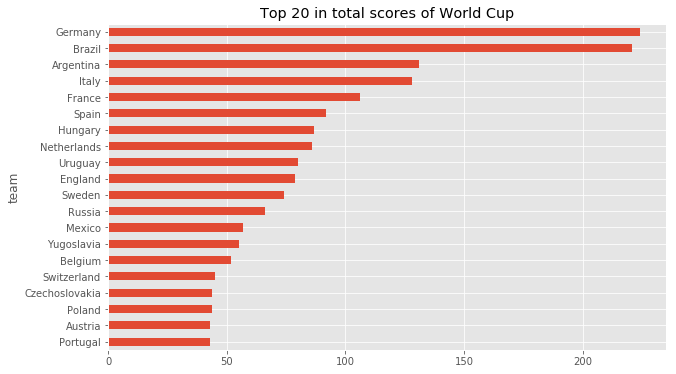

In [120]:
score_sum.sort_values(ascending=True,inplace=True)
score_sum.tail(20).plot(kind='barh',figsize=(10,6), title='Top 20 in total scores of World Cup')

In [121]:
teams = ['Russia', 'Germany', 'Brazil', 'Portugal', 'Argentina', 'Belgium', 'Poland', 'France', 
             'Spain', 'Peru', 'Switzerland', 'England', 'Colombia', 'Mexico', 'Uruguay', 'Croatia',
            'Denmark', 'Iceland', 'Costa Rica', 'Sweden', 'Tunisia', 'Egypt', 'Senegal', 'Iran',
            'Serbia', 'Nigeria', 'Australia', 'Japan', 'Morocco', 'Panama', 'Korea Republic', 'Saudi Arabia']
for team in teams:
    if team not in score_sum.index:
        print(team)

Iceland
Panama


In [123]:
team_top32 = fifa[(fifa['home_team'].isin(teams))&(fifa['away_team'].isin(teams))]
team_top32.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,diff_score,win_team,winner
1278,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,1930,3,France,France
1281,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,1930,1,Argentina,Argentina
1286,1930-07-18,Uruguay,Peru,1,0,FIFA World Cup,Montevideo,Uruguay,False,1930,1,Uruguay,Uruguay
1287,1930-07-19,Argentina,Mexico,6,3,FIFA World Cup,Montevideo,Uruguay,True,1930,3,Argentina,Argentina
1296,1930-07-30,Uruguay,Argentina,4,2,FIFA World Cup,Montevideo,Uruguay,False,1930,2,Uruguay,Uruguay


In [124]:
score_sum.index

Index(['Canada', 'Indonesia', 'Trinidad and Tobago', 'Congo DR', 'China',
       'Angola', 'Togo', 'Bolivia', 'Israel', 'El Salvador', 'Iraq',
       'United Arab Emirates', 'Kuwait', 'Haiti', 'Czech Republic', 'Honduras',
       'Jamaica', 'Egypt', 'Wales', 'Bosnia-Herzegovina', 'New Zealand',
       'Slovakia', 'Greece', 'German DR', 'Slovenia', 'Cuba', 'Ukraine',
       'Korea DPR', 'Senegal', 'Iran', 'Norway', 'Tunisia', 'Serbia',
       'Saudi Arabia', 'Ireland', 'Ecuador', 'Australia', 'South Africa',
       'Morocco', 'Algeria', 'Ivory Coast', 'Northern Ireland', 'Ghana',
       'Japan', 'Costa Rica', 'Cameroon', 'Peru', 'Nigeria', 'Turkey',
       'Croatia', 'Bulgaria', 'Scotland', 'Colombia', 'Denmark', 'Paraguay',
       'Romania', 'Korea Republic', 'USA', 'Chile', 'Portugal', 'Austria',
       'Poland', 'Czechoslovakia', 'Switzerland', 'Belgium', 'Yugoslavia',
       'Mexico', 'Russia', 'Sweden', 'England', 'Uruguay', 'Netherlands',
       'Hungary', 'Spain', 'France', 'Ital

In [125]:
team_top32_home = team_top32[['home_team', 'home_score']]
column_update = ['team', 'score']
team_top32_home.columns = column_update
team_top32_away = team_top32[['away_team', 'away_score']]
team_top32_away.columns = column_update
team_top32_all = pd.concat([team_top32_home, team_top32_away], ignore_index=True)
team_top32_scoresum = team_top32_all.groupby('team')['score'].sum()
team_top32_scoresum.sort_values(ascending=False, inplace=True)
team_top32_scoresum

team
Germany           132
Brazil            121
Argentina          76
France             57
England            53
Sweden             45
Spain              45
Uruguay            39
Belgium            37
Mexico             31
Poland             30
Russia             27
Denmark            23
Portugal           17
Korea Republic     17
Colombia           16
Switzerland        16
Japan              11
Peru               11
Nigeria            10
Costa Rica         10
Croatia             9
Tunisia             7
Australia           7
Senegal             7
Saudi Arabia        6
Morocco             5
Serbia              5
Iran                2
Egypt               0
Name: score, dtype: int64

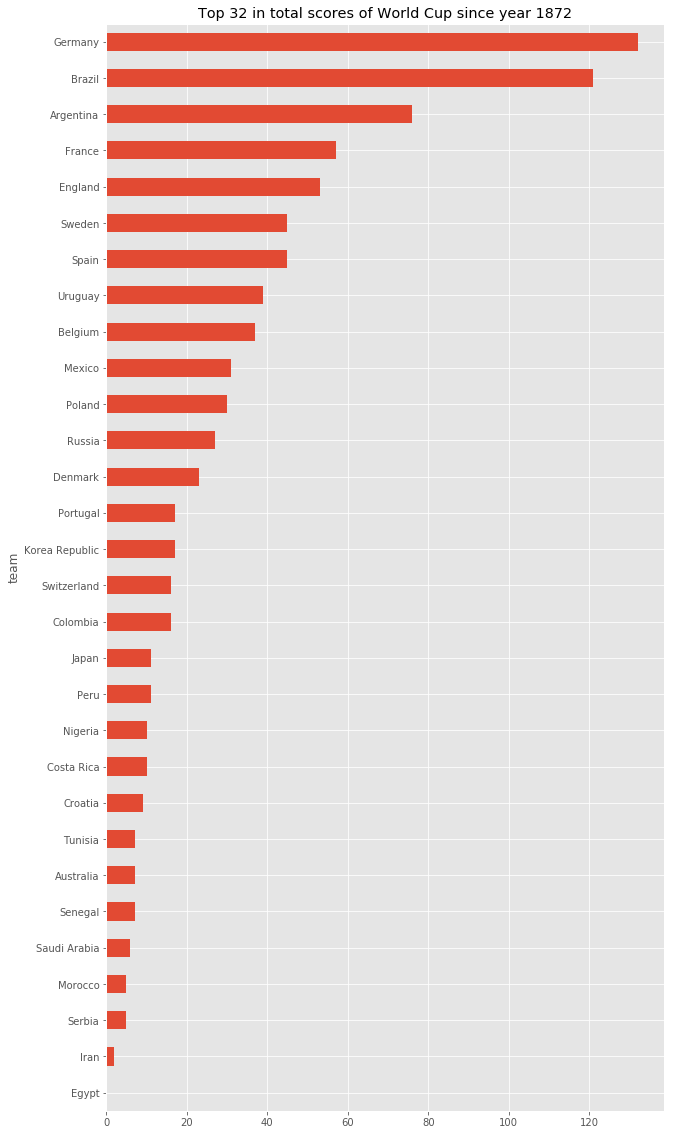

In [127]:
team_top32_scoresum.sort_values(ascending=True, inplace=True)
team_top32_scoresum.plot(kind='barh', figsize=(10,20), title='Top 32 in total scores of World Cup since year 1872')

In [131]:
team_top32_recent10 = team_top32[team_top32['year']>=1978]
team_top32_recent10.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,diff_score,win_team,winner
10423,1978-06-01,Germany,Poland,0,0,FIFA World Cup,Buenos Aires,Argentina,True,1978,0,draw,draw
10426,1978-06-02,Mexico,Tunisia,1,3,FIFA World Cup,Rosario,Argentina,True,1978,-2,Tunisia,Tunisia
10428,1978-06-03,Brazil,Sweden,1,1,FIFA World Cup,Mar del Plata,Argentina,True,1978,0,draw,draw
10431,1978-06-06,Argentina,France,2,1,FIFA World Cup,Buenos Aires,Argentina,False,1978,1,Argentina,Argentina
10432,1978-06-06,Germany,Mexico,6,0,FIFA World Cup,Córdoba,Argentina,True,1978,6,Germany,Germany


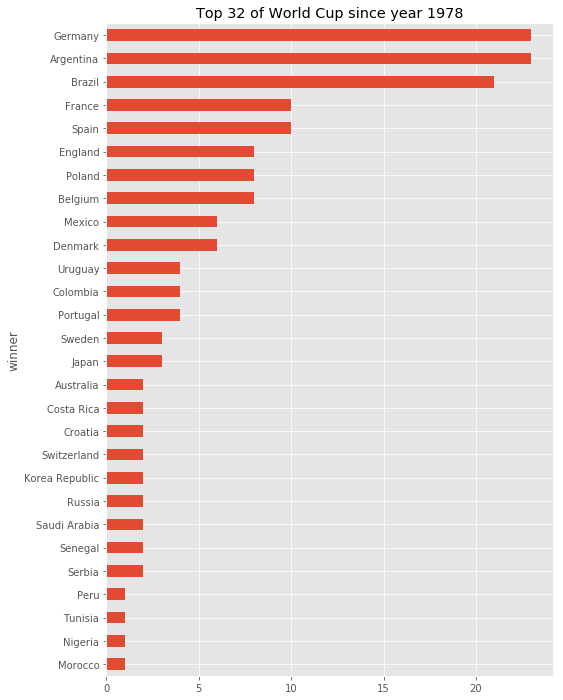

In [132]:
team_top32_recent10_scoresum = team_top32_recent10.groupby('winner')['winner'].count()
team_top32_recent10_scoresum.sort_values(ascending=False, inplace=True)
team_top32_recent10_scoresum.drop(labels=['draw'], inplace=True)
team_top32_recent10_scoresum.sort_values(ascending=True, inplace=True)
team_top32_recent10_scoresum.plot(kind='barh', figsize=(8, 12), title='Top 32 of World Cup since year 1978')

In [133]:
team_top32_recent10_home = team_top32_recent10[['home_team', 'home_score']]
column_update = ['team', 'score']
team_top32_recent10_home.columns = column_update
team_top32_recent10_away = team_top32_recent10[['away_team', 'away_score']]
team_top32_recent10_away.columns = column_update
team_top32_recent10_all = pd.concat([team_top32_recent10_home, team_top32_recent10_away], ignore_index=True)
team_top32_recent10_scoresum = team_top32_recent10_all.groupby('team')['score'].sum()
team_top32_recent10_scoresum.sort_values(ascending=False, inplace=True)
team_top32_recent10_scoresum.head()

team
Germany      81
Argentina    56
Brazil       55
France       37
Spain        31
Name: score, dtype: int64

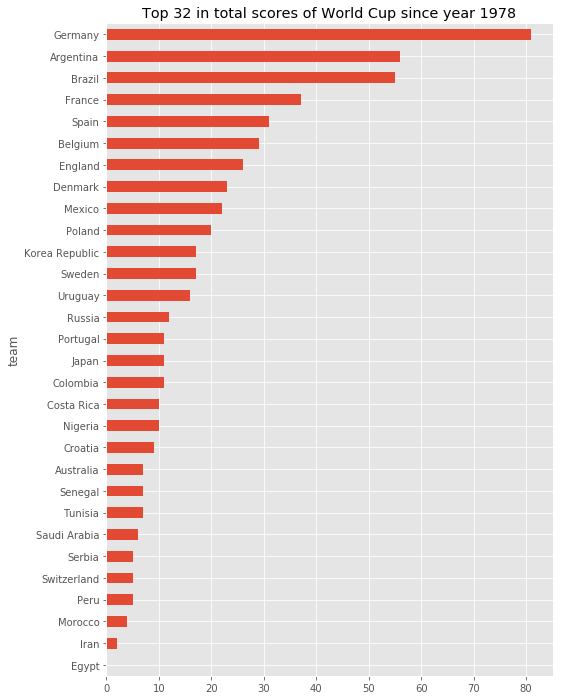

In [139]:
team_top32_recent10_scoresum.sort_values(ascending=True, inplace=True)
team_top32_recent10_scoresum.plot(kind='barh', figsize=(8, 12), title='Top 32 in total scores of World Cup since year 1978')

In [144]:
!python --version

Python 3.6.3 :: Anaconda custom (64-bit)


In [145]:
cd

/home/mark


In [146]:
!pwd

/home/mark


In [147]:
!ipython profile create

[ProfileCreate] Generating default config file: '/home/mark/.ipython/profile_default/ipython_config.py'
[ProfileCreate] Generating default config file: '/home/mark/.ipython/profile_default/ipython_kernel_config.py'


In [148]:
ls

anaconda3/      dump.rdb          node_modules/       similarProducts.Rdata
arch.tar.gz     examples.desktop  opencv/             Snapshots/
bin/            geckodriver.log   opencv_contrib/     Templates/
CO2.txt         ghostdriver.log   opt/                ^?V
_configtest.f   hello.cpp         Pictures/           venv/
configuration/  Microsoft/        Public/             Videos/
Desktop/        Music/            R/                  VirtualBox VMs/
Documents/      myALL.Rdata       saleClean.Rdata
Downloads/      nltk_data/        scikit_learn_data/
